In [1]:
# Common
import os
import cv2 as cv
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import MeanIoU
# from tensorflow.keras.utils import img_to_array, load_img

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow.keras as keras

2023-01-01 13:50:10.445053: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dev/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-01 13:50:10.445070: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [1]:
import os
import cv2 as cv
import pandas as pd
from tqdm import tqdm

import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import *
from tensorflow.keras import Sequential

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import *

from tensorflow import keras

2023-01-08 14:24:49.869133: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-08 14:24:50.563867: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dev/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-08 14:24:50.563882: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-08 14:24:51.967373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerro

In [9]:

os.listdir()

['notebook.ipynb',
 'notebook-Copy2.ipynb',
 'waterBodiesDataset',
 'UNet.h5',
 '.ipynb_checkpoints',
 'AttentionUNet.h5',
 'model_loading.ipynb']

In [11]:
os.listdir("./")

['notebook.ipynb',
 'notebook-Copy2.ipynb',
 'waterBodiesDataset',
 'UNet.h5',
 '.ipynb_checkpoints',
 'AttentionUNet.h5',
 'model_loading.ipynb']

In [3]:
images = []
mask = []

# image_path = '../input/satellite-images-of-water-bodies/Water Bodies Dataset/Images/'
# mask_path = '../input/satellite-images-of-water-bodies/Water Bodies Dataset/Masks/'

image_path = './waterBodiesDataset/Images/'
mask_path = './waterBodiesDataset/Masks/'

image_names = sorted(next(os.walk(image_path))[-1])
mask_names = sorted(next(os.walk(mask_path))[-1])

if image_names == mask_names:
    print('Image and Mask are corretly Placed!!')

Image and Mask are corretly Placed!!


In [4]:
image_names = image_names[:200]
mask_names = mask_names[:200]

In [5]:
SIZE = 128
images = np.zeros(shape=(len(image_names),SIZE, SIZE, 3))
masks = np.zeros(shape=(len(image_names),SIZE, SIZE, 1))

for id in tqdm(range(len(image_names)), desc="Images"):
    path = image_path + image_names[id]
    img = img_to_array(load_img(path)).astype('float')/255.
    img = cv.resize(img, (SIZE,SIZE), cv.INTER_AREA)
    images[id] = img

for id in tqdm(range(len(mask_names)), desc="Mask"):
    path = mask_path + mask_names[id]
    mask = img_to_array(load_img(path)).astype('float')/255.
    mask = cv.resize(mask, (SIZE,SIZE), cv.INTER_AREA)
    masks[id] = mask[:,:,:1]

Mask: 100%|██████████| 200/200 [00:01<00:00, 183.47it/s]


In [6]:
def show_image(image, title=None, cmap=None):
    plt.imshow(image, cmap=cmap)
    if title is not None: plt.title(title)
    plt.axis('off')

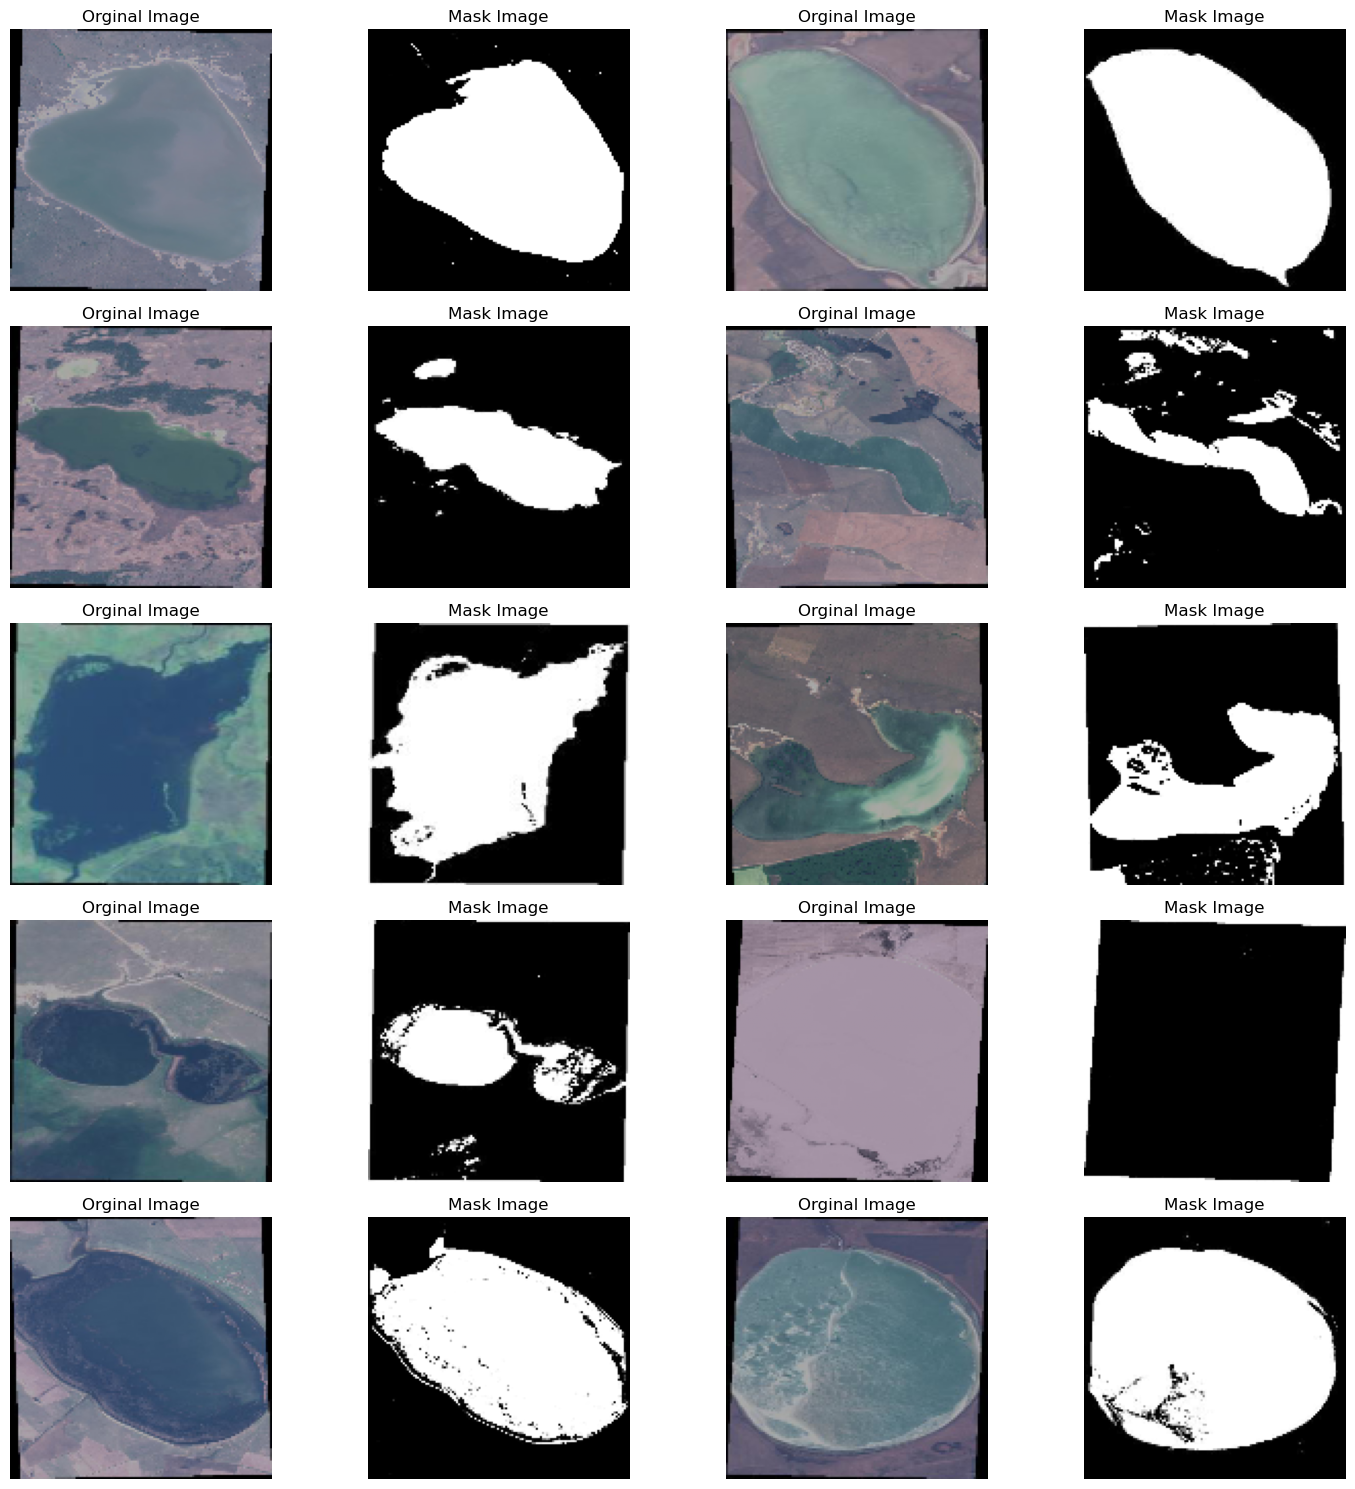

In [7]:
plt.figure(figsize=(15,15))
for i in range(1,21):
    plt.subplot(5,4,i)
    if i%2!=0:
        id = np.random.randint(len(images))
        show_image(images[id], title="Orginal Image")
    elif i%2==0:
        show_image(masks[id].reshape(128,128), title="Mask Image", cmap='gray')
plt.tight_layout()
plt.show()

In [15]:
new_model = tf.keras.models.load_model('./UNet.h5', custom_objects={'EncoderBlock': EncoderBlock})

# Check its architecture
new_model.summary()


NameError: name 'EncoderBlock' is not defined

In [12]:
os.listdir("./")

['notebook.ipynb',
 'notebook-Copy2.ipynb',
 'waterBodiesDataset',
 'UNet.h5',
 '.ipynb_checkpoints',
 'AttentionUNet.h5',
 'model_loading.ipynb']